In [132]:
#!/usr/bin/env python3

import sys
import os
import numpy as np
import subprocess
import pandas as pd
import pyperclip
import math
import matplotlib.pyplot as plt

def build_graph (X:np.array, Y:np.array, x_name:str='', y_name:str='', x_dim:str = '', y_dim:str = '', name:str = '', no_line:bool = True, color:str = 'black', color_dot:str = 'blue', include_zero:bool = False, dx:np.array = np.array ([]), dy:np.array = np.array ([]), function:str='none', aprx_l=0, aprx_r=-1, figure=0, line_name='', aprx_only=False):

    k = -1.0
    b = -1.0

    xlimL = min (X) * 0.8
    ylimL = min (Y) * 0.8
    xlimR = max (X) * 1.2
    ylimR = max (Y) * 1.2
    if (include_zero):
        xlimL = min (0, xlimL)
        ylimL = min (0, ylimL)
        xlimR = max (0, xlimR)
        ylimR = max (0, ylimR)

    ax1 = 0
    if (figure == 0):
        fig = plt.figure (figsize=(16, 9), dpi=200)
        ax1 = fig.add_subplot (111)
        ax1.set_title (rf'{name}', fontsize=17)
    else:
        fig = figure
        ax1 = fig.axes[0]
        xlimL = min (ax1.get_xlim()[0], xlimL)
        xlimR = max (ax1.get_xlim()[1], xlimR)
        ylimL = min (ax1.get_ylim()[0], ylimL)
        ylimR = max (ax1.get_ylim()[1], ylimR)


    if (no_line == False): ax1.plot (X, Y, color = color, linestyle = '-', markersize=0, linewidth=0.5)
    if (aprx_only == False):
        if (line_name == 0):ax1.scatter (X, Y, label = rf'{y_name}({x_name})', color = color_dot, marker='+', s=50, linewidths=1)
        else: ax1.scatter (X, Y, label = rf'{y_name}({x_name})' + '   : ' + str(line_name), color = color_dot, marker='+', s=50, linewidths=1)

    if function == 'lin':
        if (aprx_r == -1):
            aprx_r = len (X)
        model = np.poly1d (np.polyfit (X[aprx_l:aprx_r], Y[aprx_l:aprx_r], deg = 1))
        approx = rf'$({str (model[1])}) * x + ({str (model[0])})$' + '   : ' + str (line_name)
        k = float (model[1])
        b = float (model[0])
        x_range = np.linspace (min(X) * 0.9, max (X) * 1.1, 2)
        ax1.plot (x_range, model (x_range), '--', color = 'orange', label = approx)

    ax1.set_xlabel (rf'{x_name}, {x_dim}', size=20)
    ax1.set_ylabel (rf'{y_name}, {y_dim}', size=20)
    ax1.set_xlim (xlimL, xlimR)
    ax1.set_ylim (ylimL, ylimR)
    ax1.legend (fontsize=10)
    ax1.grid ()
    return (fig, (k, b))



#write_as_column - outputs as table column
#vertical=True - outputs a transponded version
#vertical=False - outputs a non transponded version
#if total_rows > amount of resulting rows then add empty elements
#if total_columns > amount of resulting columns then add empty columns
def arr_to_tex (arr:np.ndarray, outfile:str = '/dev/null', append:bool = False, to_clip:bool = False, precision=2, as_column:bool=False, vertical:bool=False, header:bool=True, col_total:int=0, row_total:int=0, caption:str = ''):
    tex_out =''
    if (header):
        tex_out += '\n\\begin{table}[H]\n\\caption{' + caption + '}\n\\begin{center}\n\\begin{tabular}{|c|*{15}{c|}}\\hline\n'

    if (arr.ndim == 1):
        for i in arr:
            if (isinstance (i, str)): tex_out += i
            else: tex_out += str (round (i, precision))
            tex_out += ' & '
            if (as_column): tex_out += '\n'
        if (as_column): tex_out += ' & \n' * max (0, row_total - len (arr))
        else: tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - len (arr)) + '\\\\\\hline\n'
    elif (arr.ndim == 2):
        if (vertical):
            row_n = arr.shape[0]
            col_n = arr.shape[1]
            for i in range (row_n):
                for j in range (col_n):
                    if (isinstance (arr[j][i], str)): tex_out += arr[j][i]
                    else: tex_out += str (round (arr[j][i], precision))
                    tex_out += ' & '
                tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - col_n) + '\\\\\\hline\n'
            tex_out += (' & ' * col_total + '\\\\\\hline\n') * row_total
        else:
            row_n = arr.shape[1]
            col_n = arr.shape[0]
            for i in arr:
                for j in i:
                    if (isinstance (j, str)): tex_out += j
                    else: tex_out += str (round (j, precision))
                    tex_out += ' & '
                tex_out = tex_out[:-3] +  ' & ' * max (0, col_total - col_n) + '\\\\\\hline\n'
            tex_out += (' & ' * col_total + '\\\\\\hline\n') * row_total

    if (header): tex_out += '\\end{tabular}\n\\end{center}\n\\end{table}\n\n'

    if (to_clip):
        clip_content = ''
        if (append): clip_content = pyperclip.paste ()
        clip_content += tex_out
        pyperclip.copy (clip_content)

    open_str = 'w'
    if (append): open_str = 'a'

    with open (outfile, open_str) as output:
        print (tex_out, file = output)


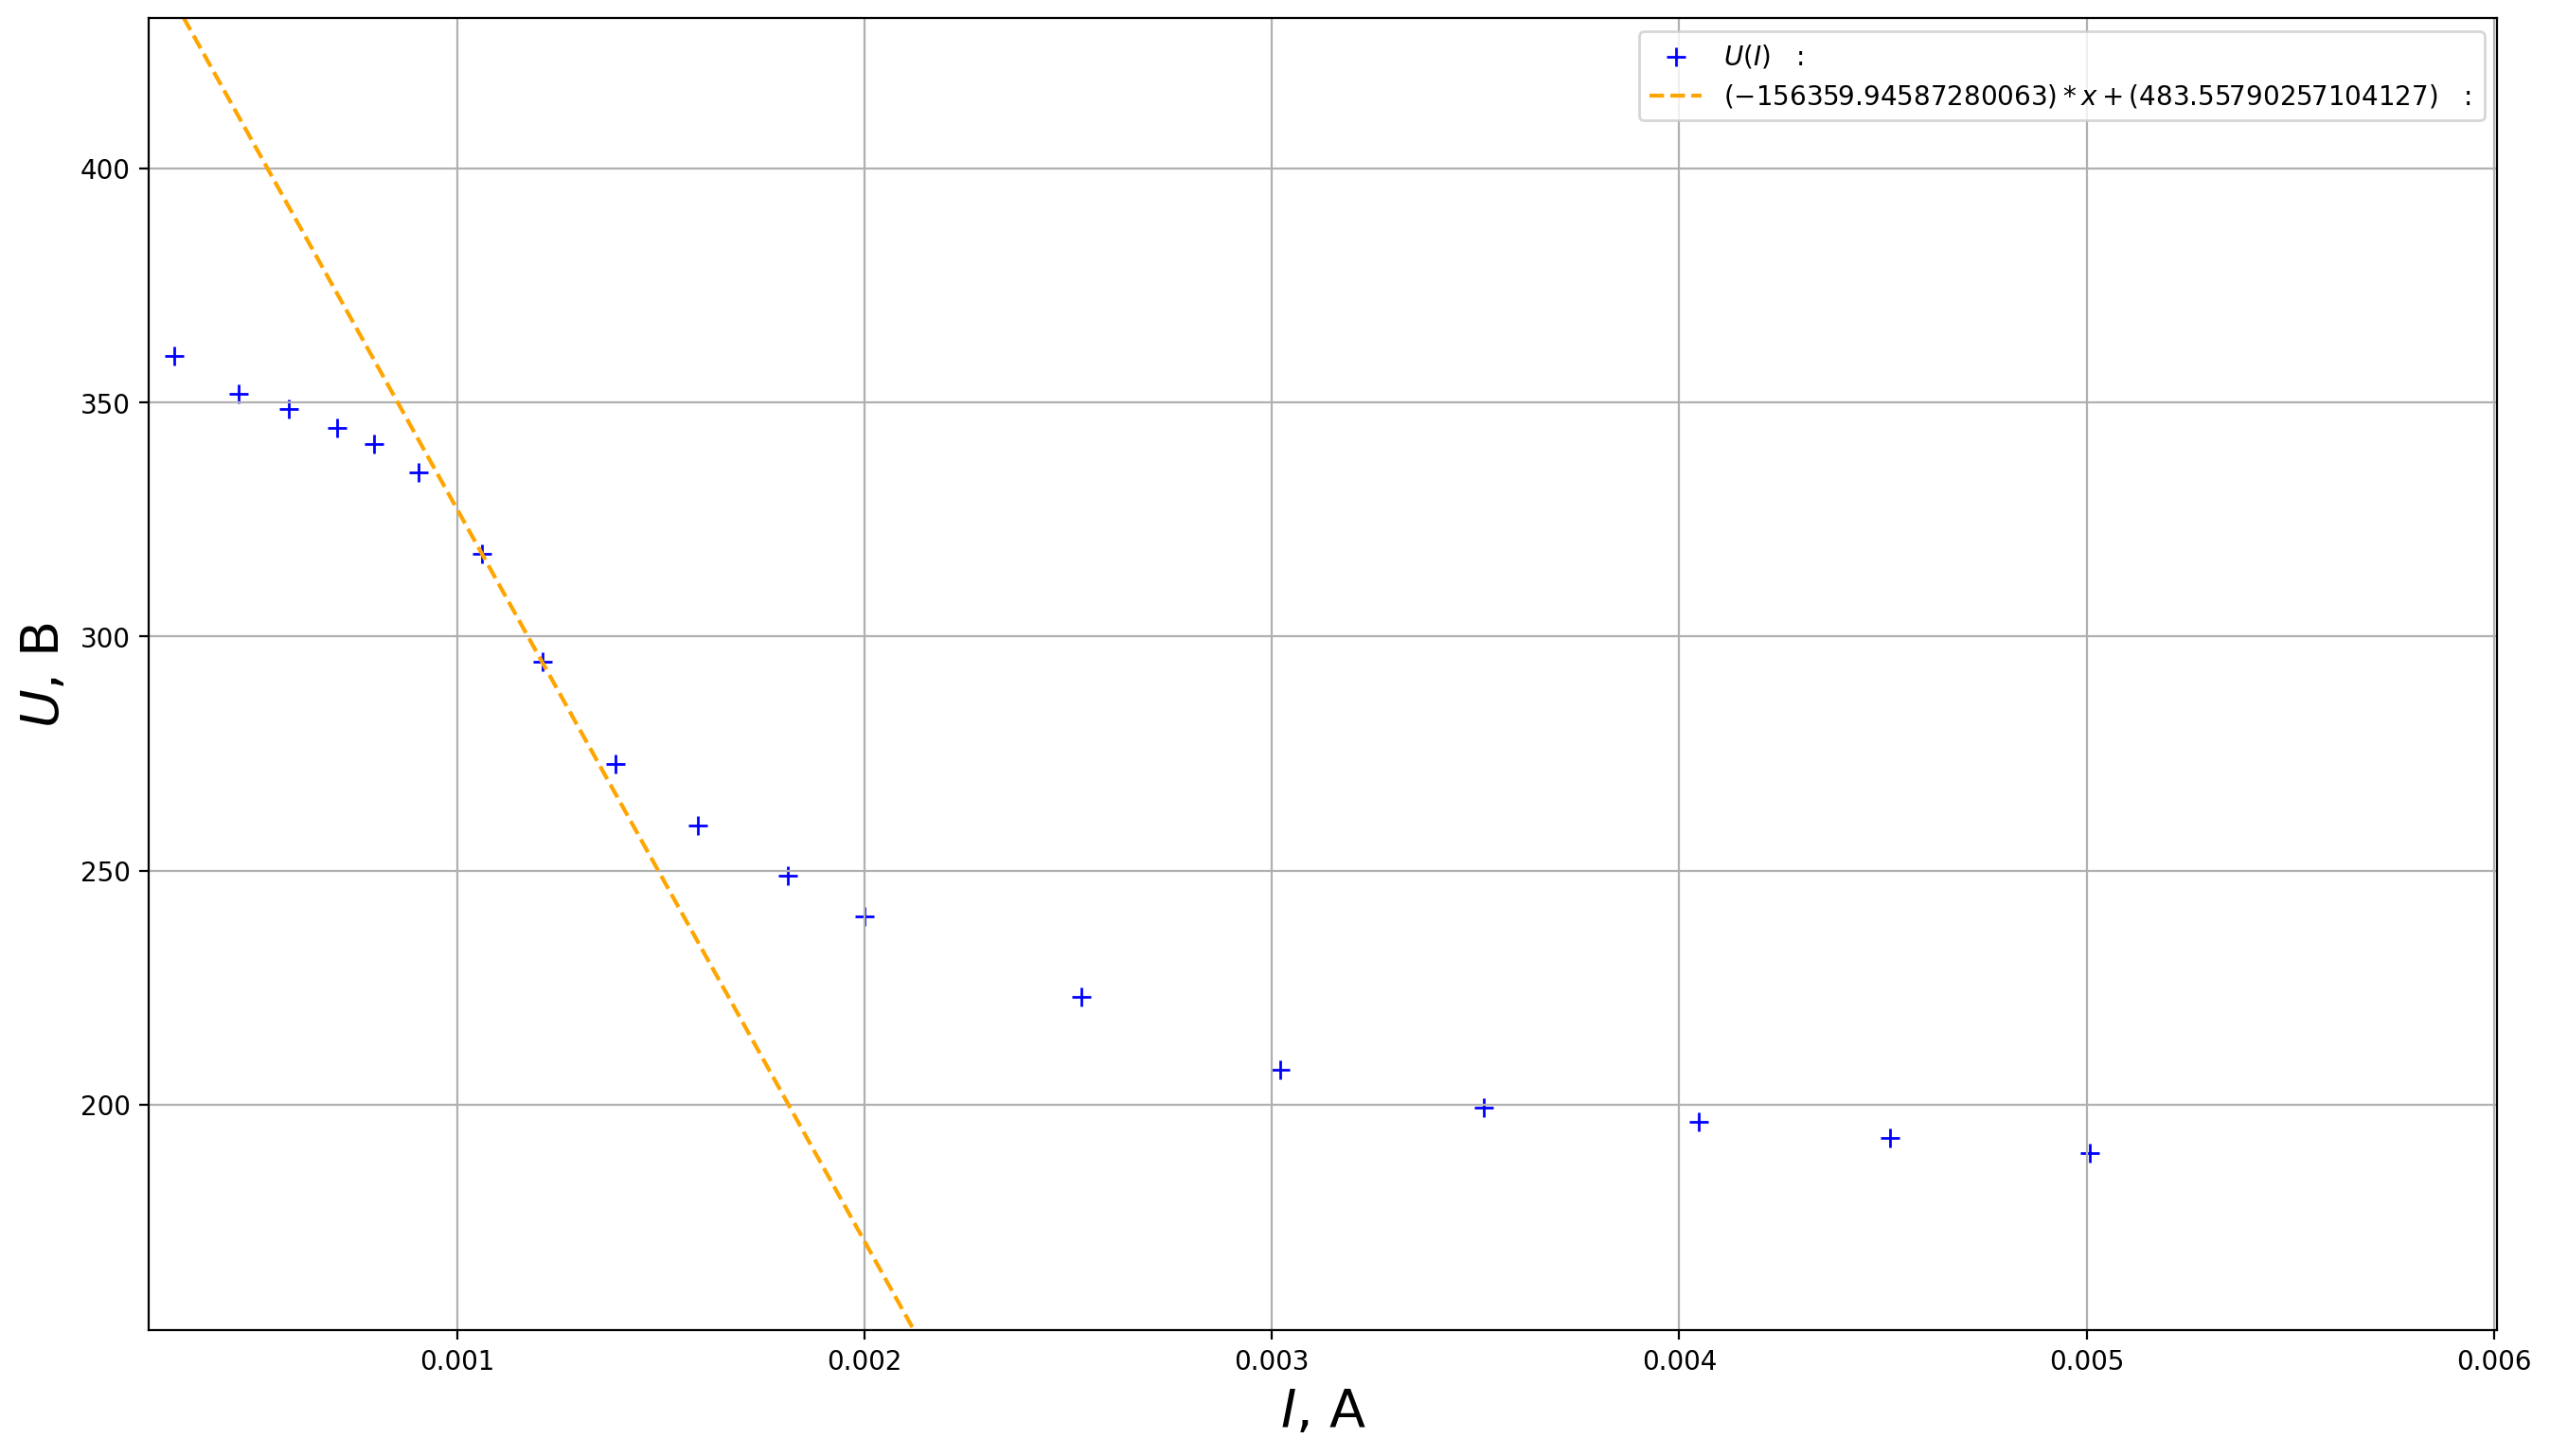

In [133]:
I = np.array ([0.305,0.4631,0.5871,0.7053,0.7955,0.9043,1.061,1.2088,1.39,1.5907,1.81084,2.0011,2.5329,3.0196,3.5207,4.0472,4.5167,5.007]) * 10 **-3
U = np.array ([36, 35.176, 34.86, 34.447, 34.113, 33.513, 31.766, 29.455, 27.279, 25.96, 24.895, 24.016, 22.312, 20.742, 19.94, 19.635, 19.293, 18.97]) * 10

(fig, (k, b)) = build_graph (I, U, r'$I$', r'$U$', r'А', r'В', aprx_l=6, aprx_r=8, function='lin')

fig.savefig ('pics/graph1.png')


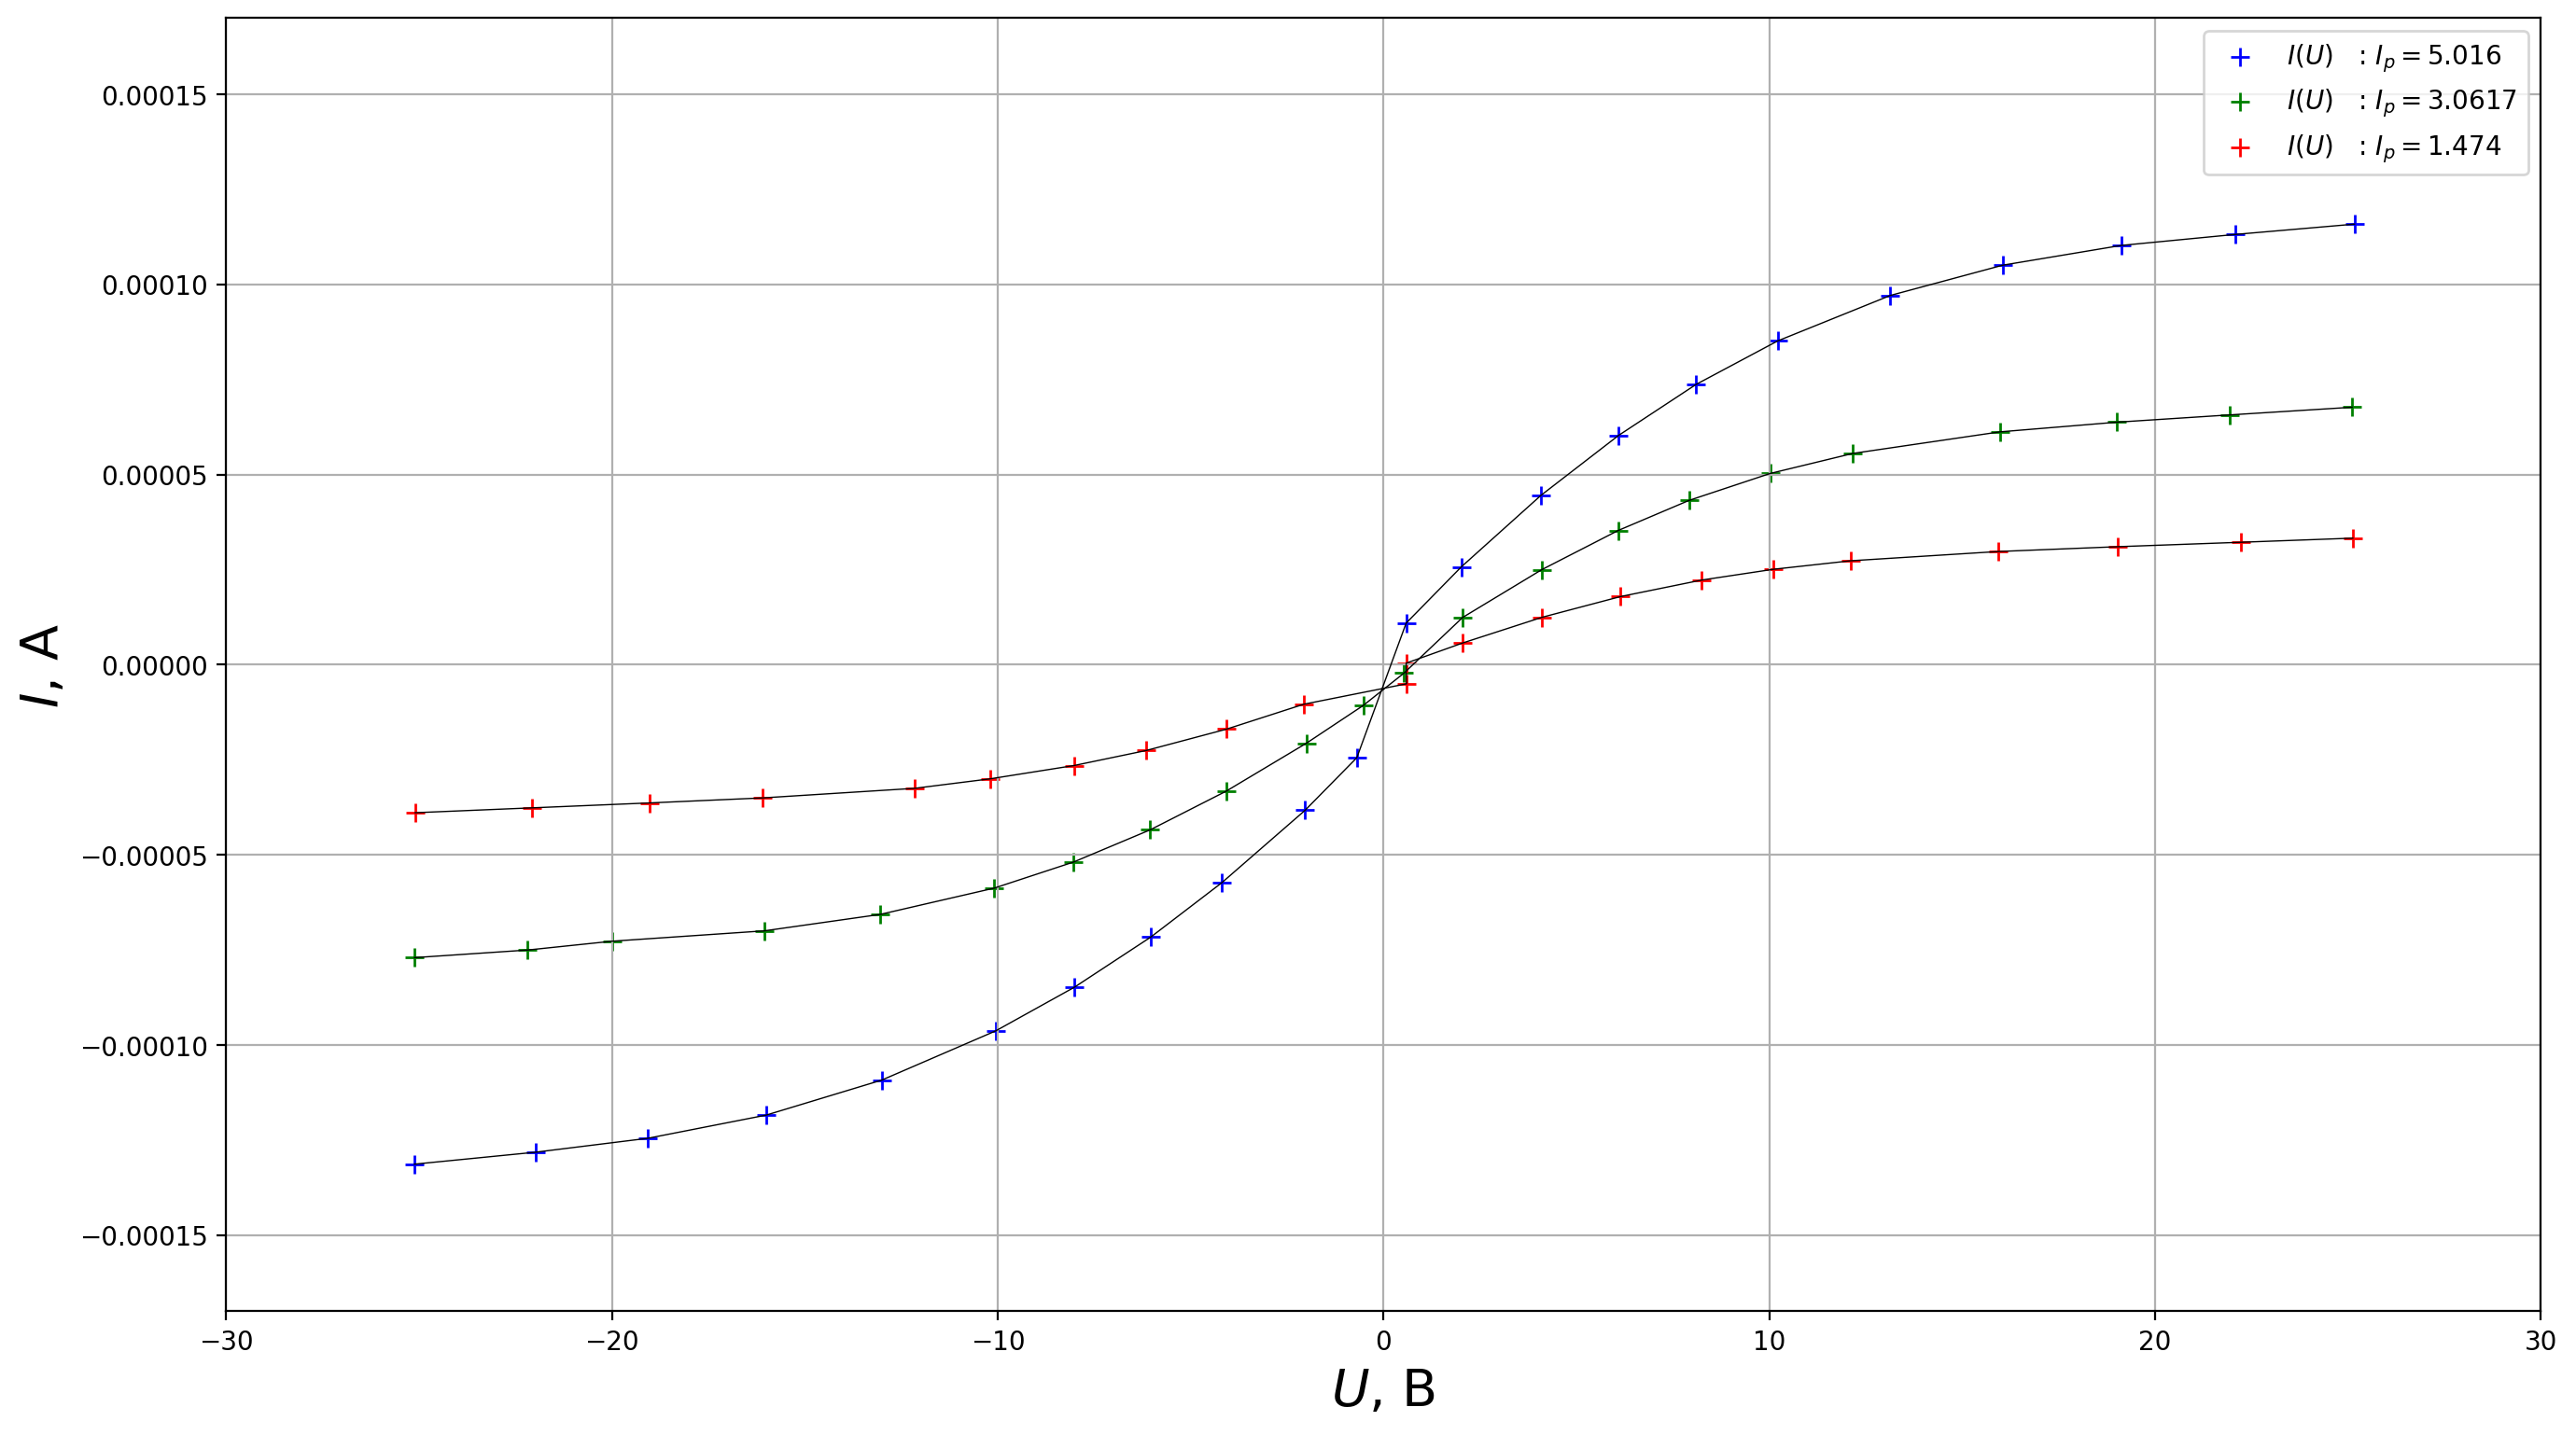

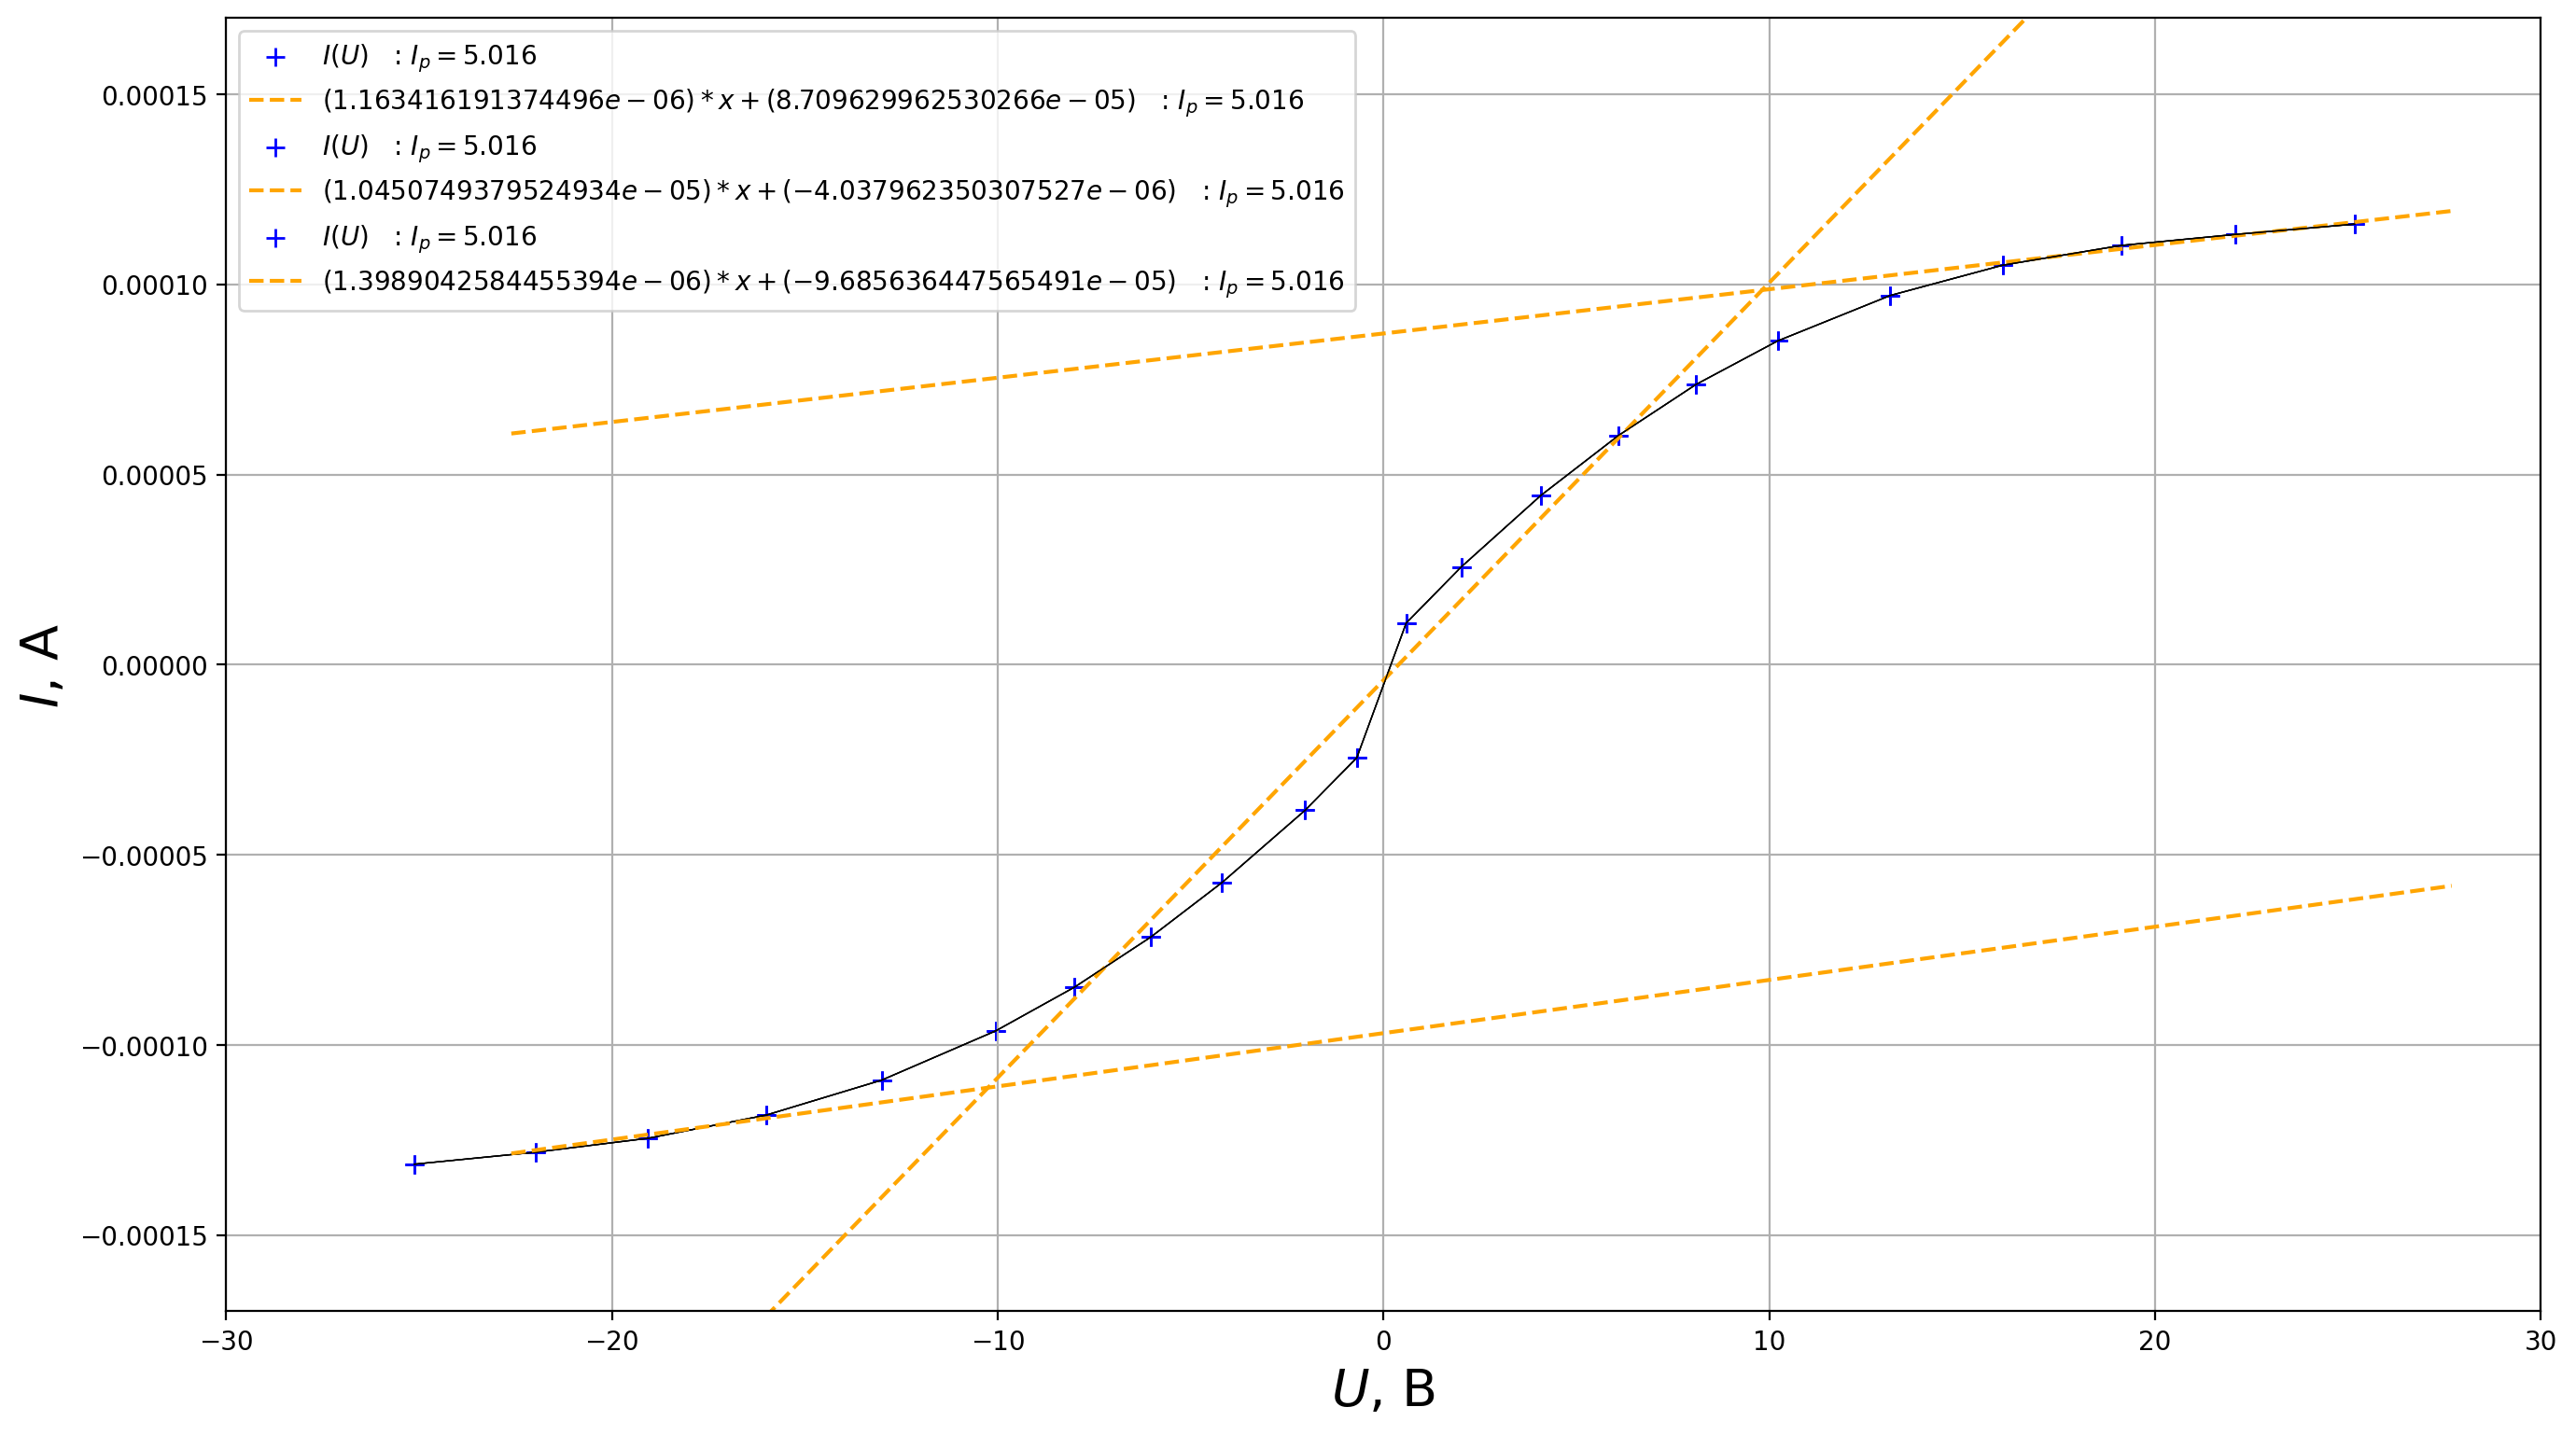

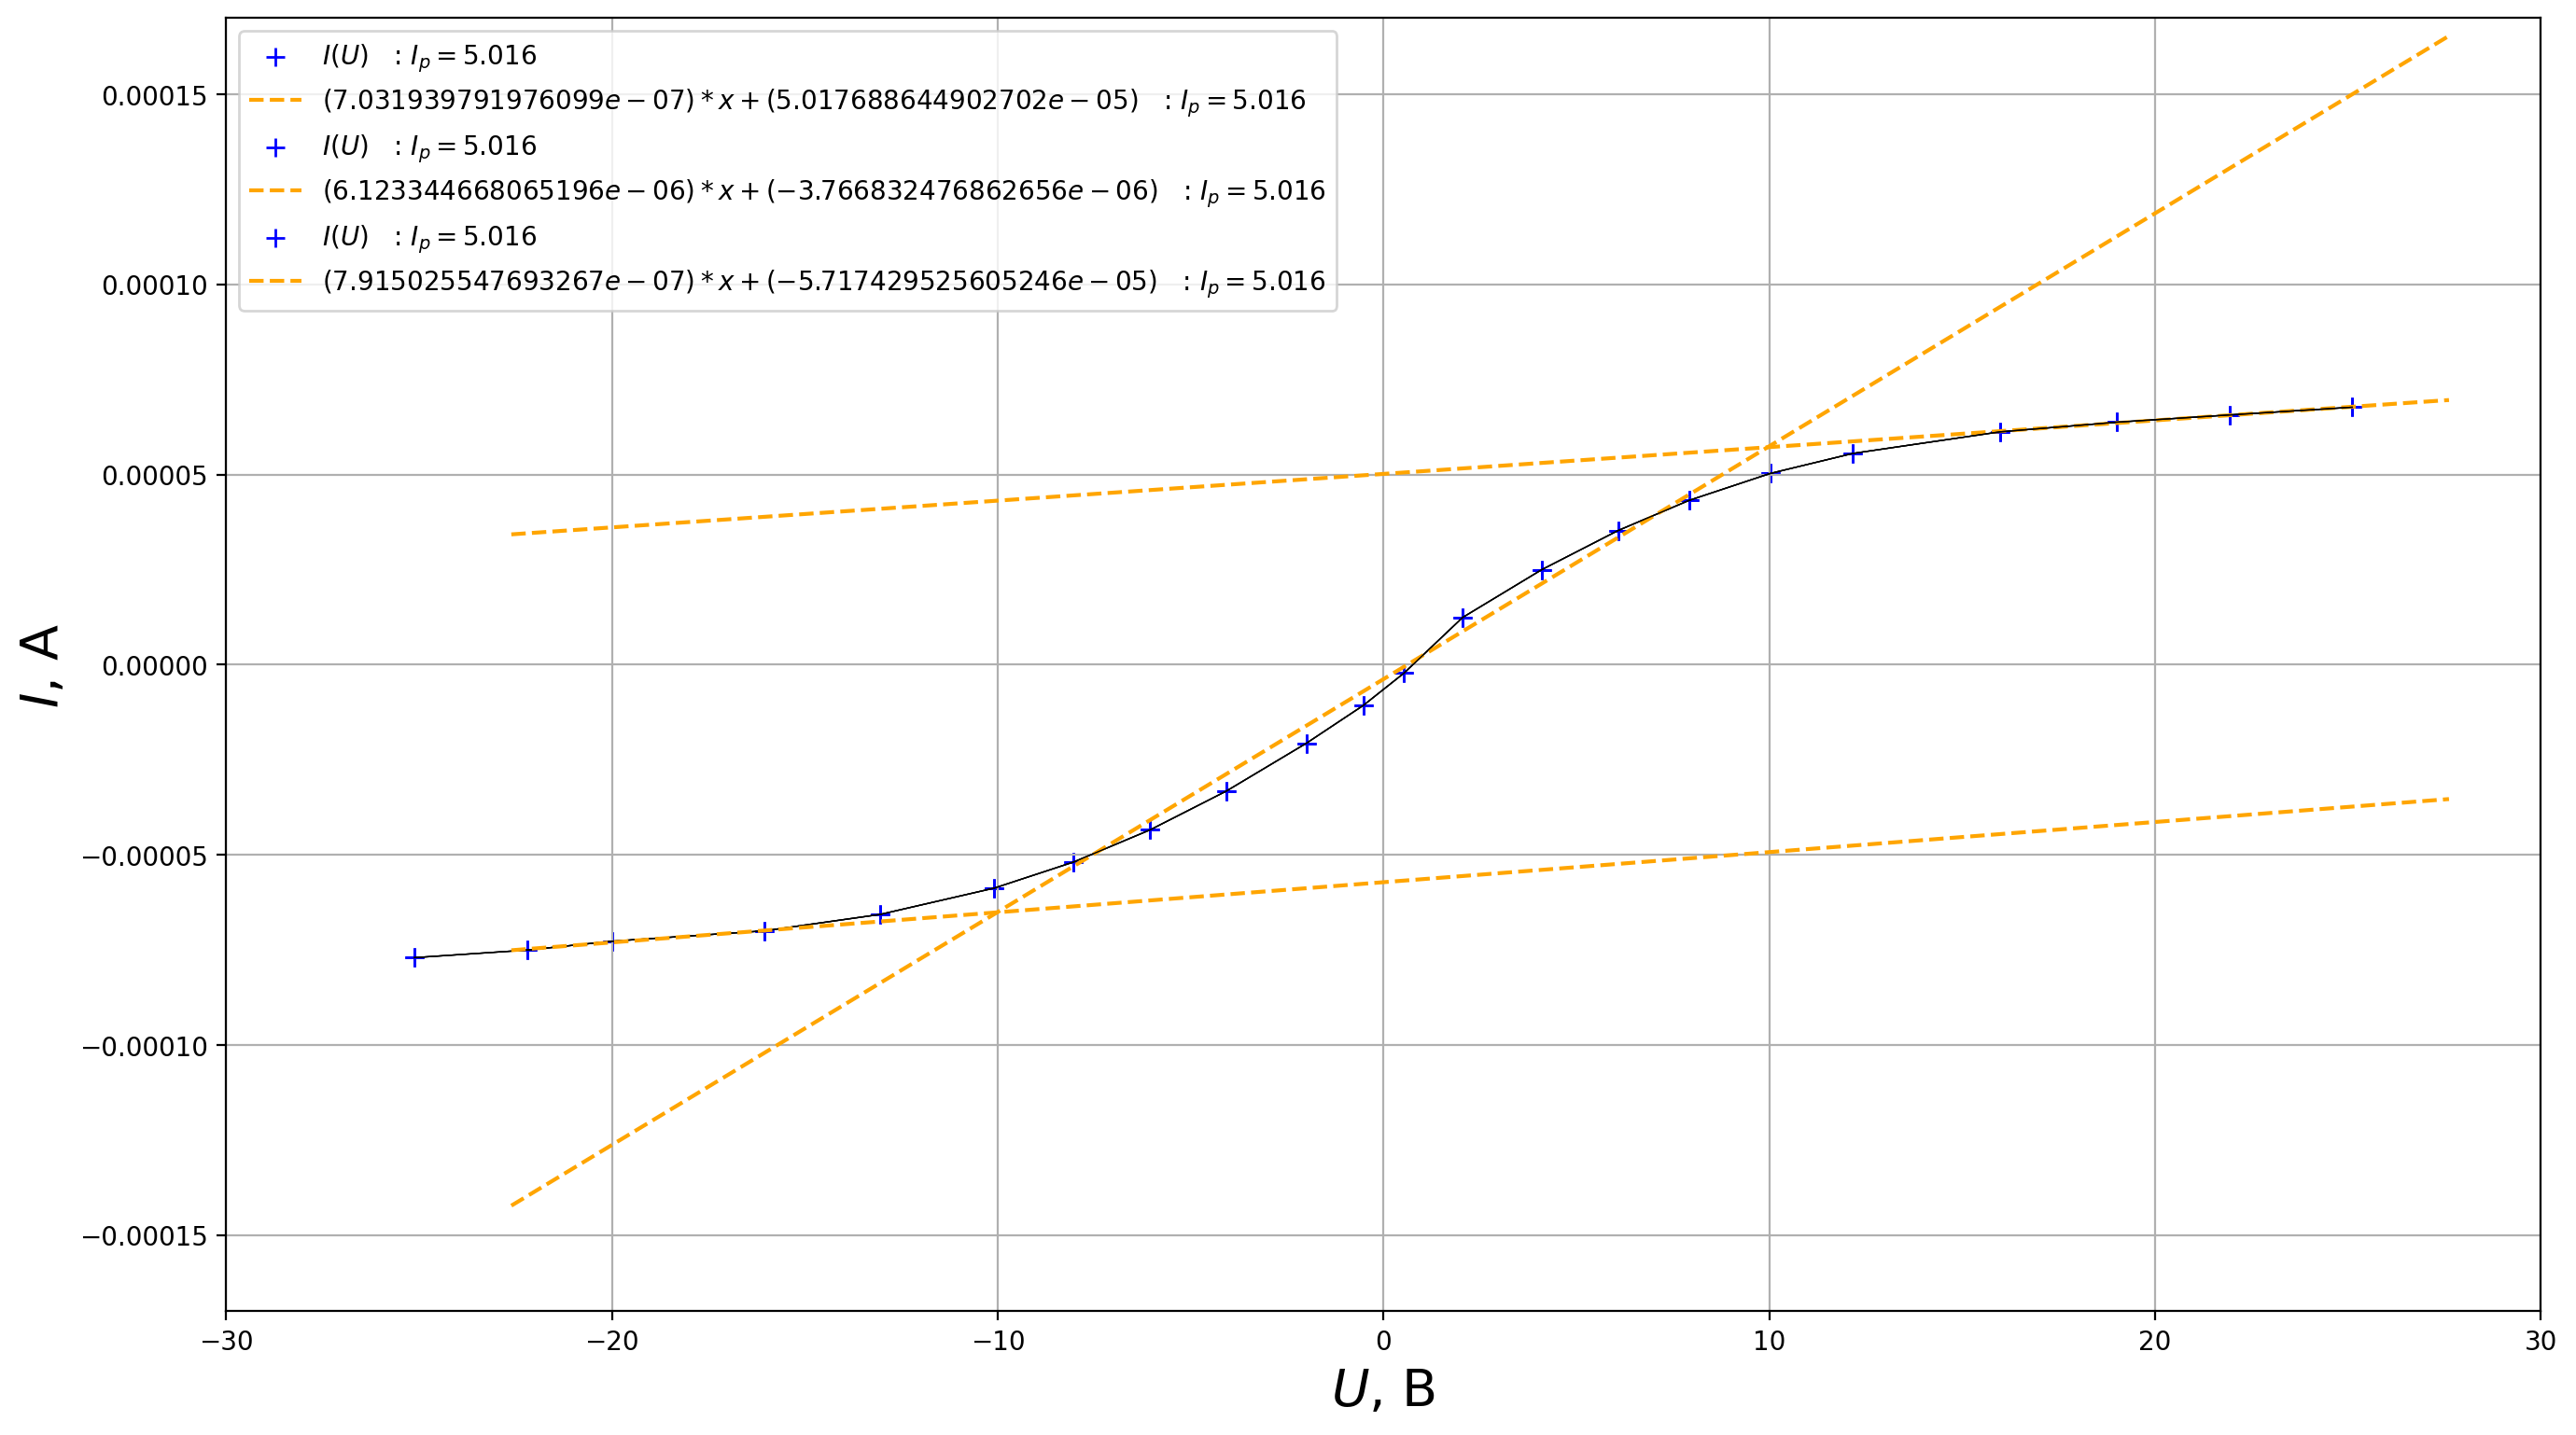

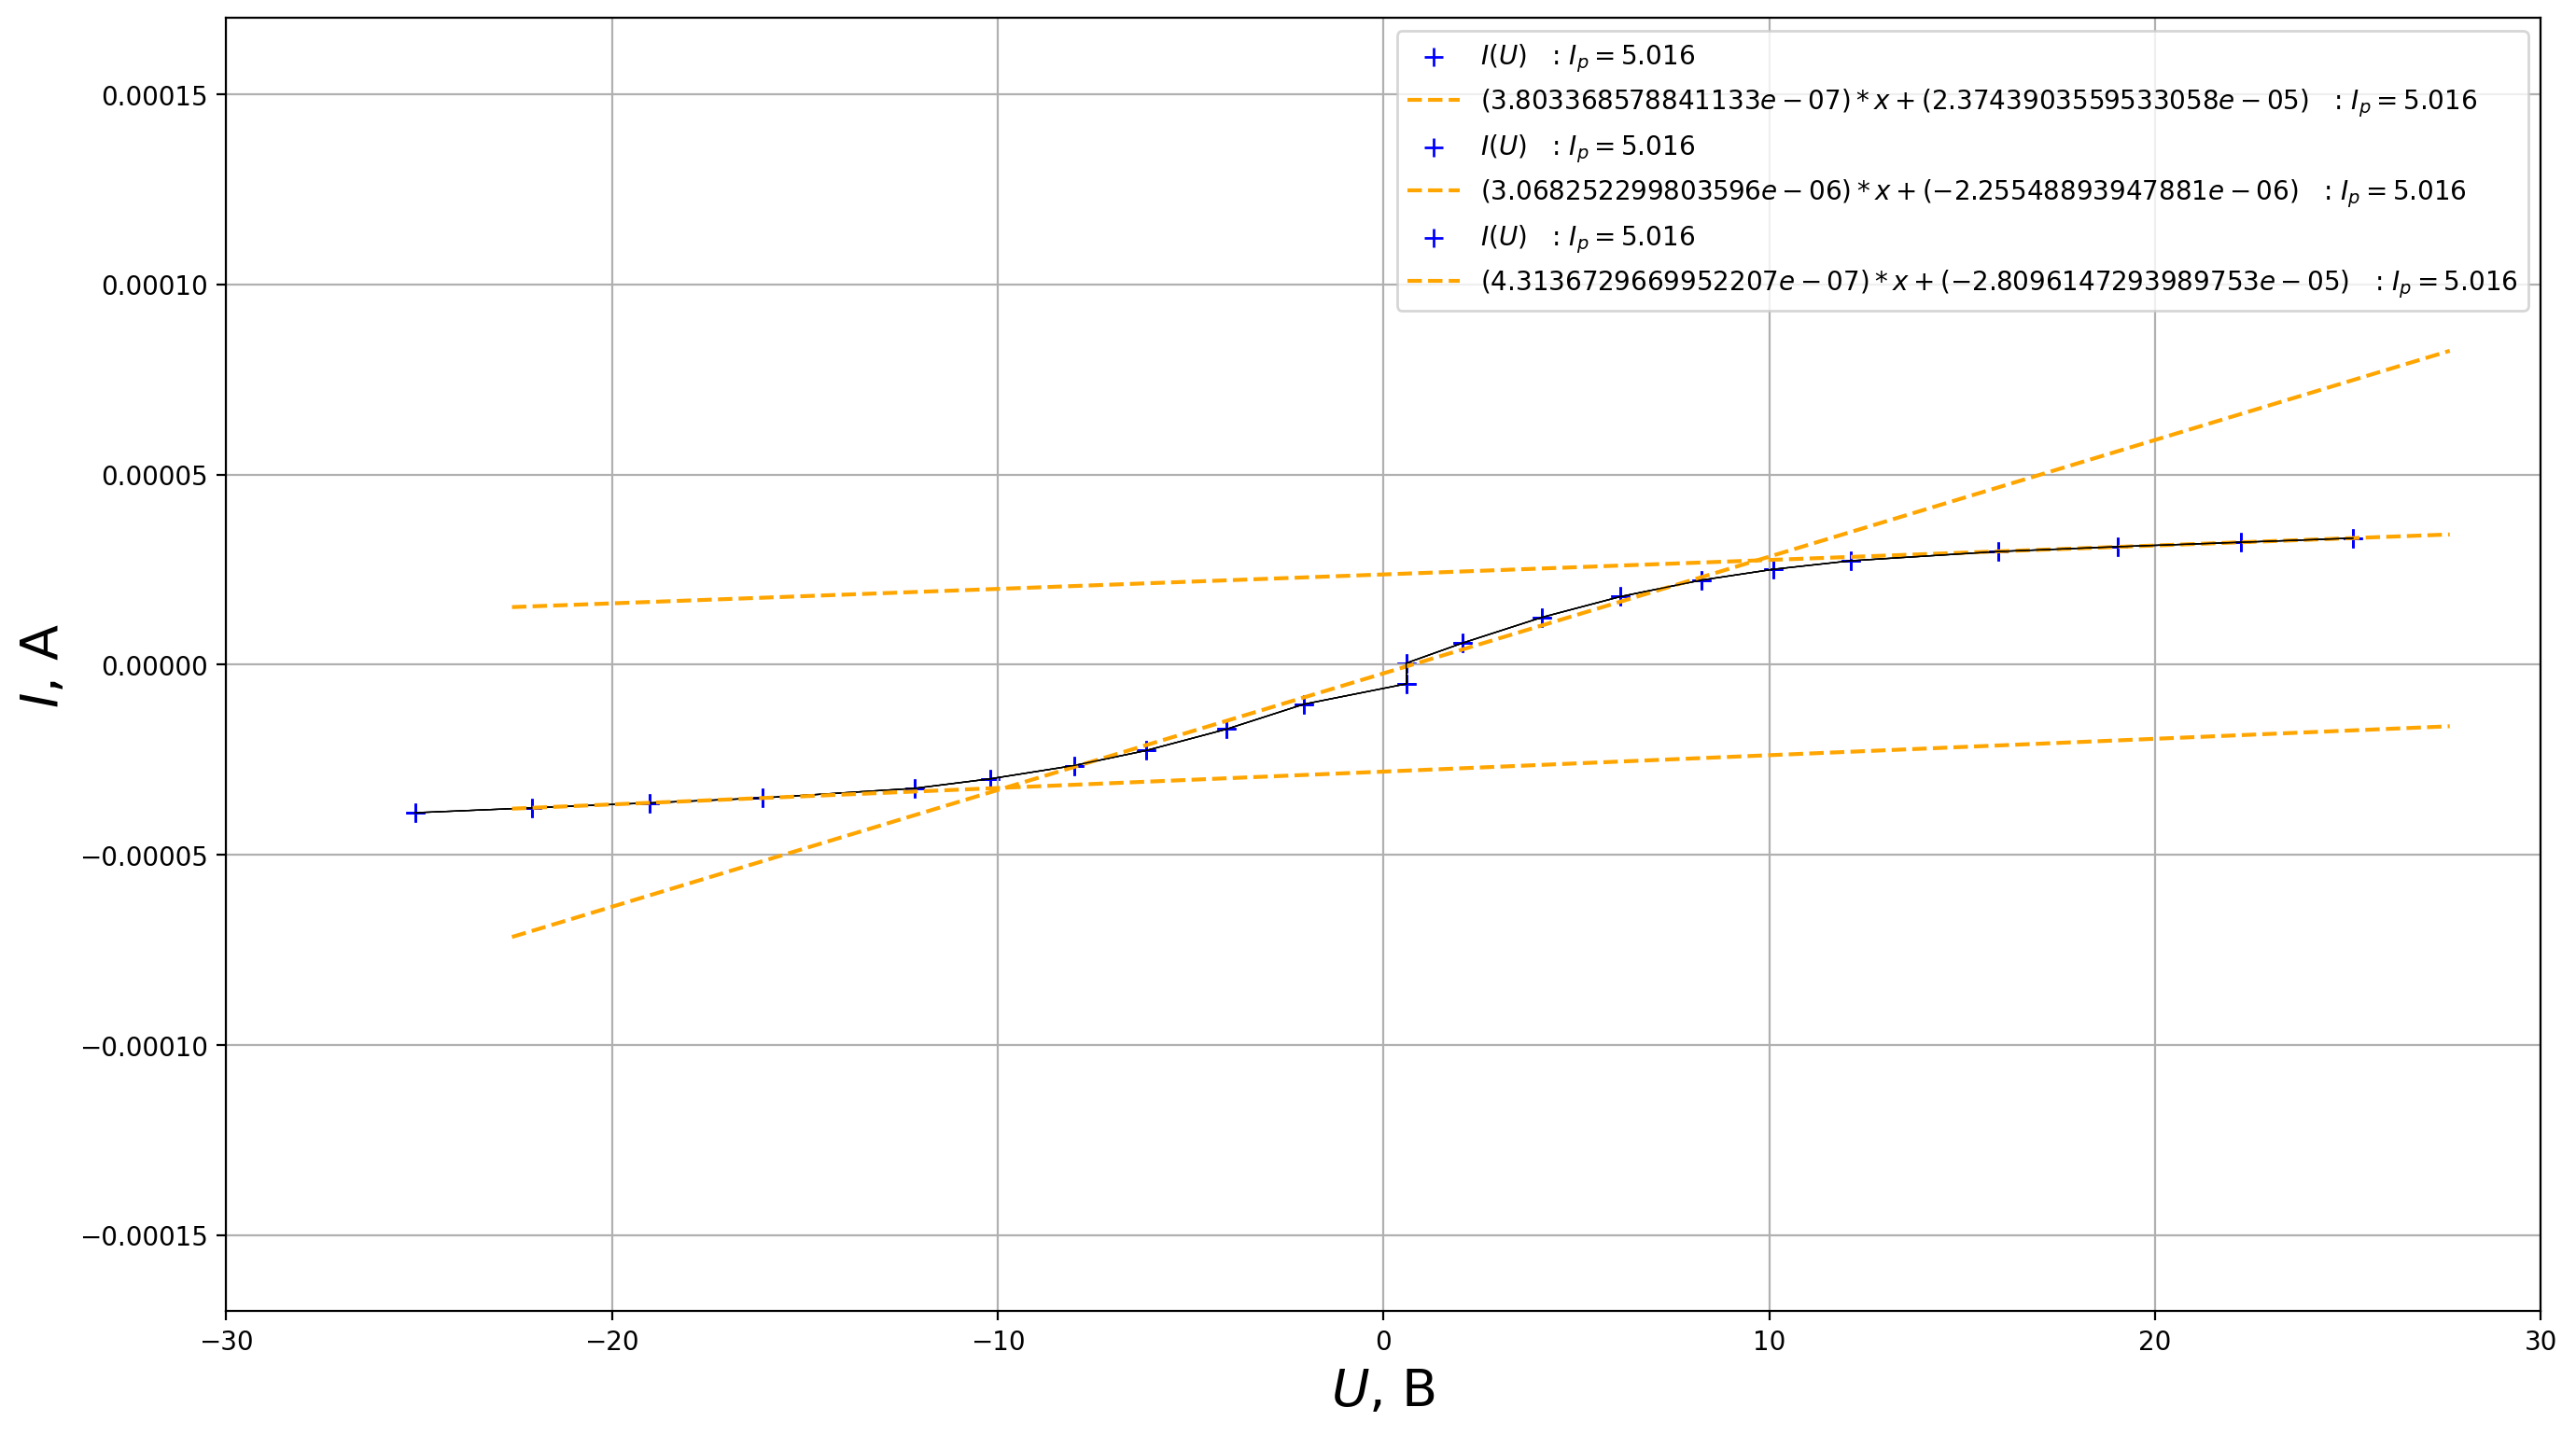

In [134]:
U1 = np.array ([25.169, 22.071, 19.118, 16.05, 13.136, 10.216, 8.102, 6.091, 4.0814, 2.0157, 0.5851, -0.6944, -2.0343, -4.1946, -6.039, -8.013, -10.055, -13.01, -16.005, -19.073, -21.988, -25.123])
U2 = np.array ([25.106, 21.925, 19.007, 15.977, 12.166, 10.022, 7.919, 6.079, 4.0969, 2.0475, 0.5268, -0.5303, -2.0032, -4.0803, -6.053, -8.038, -10.093, -13.047, -16.055, -19.998, -22.188, -25.123])
U3 = np.array ([25.124, 22.225, 19.021, 15.937, 12.106, 10.108, 8.239, 6.145, 4.1065, 2.053, 0.5846, 0.5948, -2.067, -4.0701, -6.158, -8.029, -10.207, -12.161, -16.104, -19.019, -22.082, -25.104])
I_p = [5.016, 3.0617, 1.474]
I1 = np.array ([-115.84, -113.13, -110.24, -105.05, -97.09, -85.14, -73.71, -60.29, -44.55, -25.74, -10.95, -24.45, -38.26, -57.32, -71.63, -84.78, -96.27, -109.21, -118.41, -124.51, -128.17, -131.31]) * 10**-6
I2 = np.array ([-67.7, -65.68, -63.77, -61.23, -55.56, -50.29, -43.21, -35.29, -24.98, -12.42, 2.22, -10.73, -20.65, -33.24, -43.42, -51.88, -58.73, -65.64, -69.97, -72.69, -75.01, -77.01]) * 10**-6
I3 = np.array ([-33.28, -32.2, -31.03, -29.77, -27.33, -25.1, -22.25, -17.93, -12.47, -5.73, -0.41, -5.01, -10.38, -16.93, -22.56, -26.51, -30.01, -32.5, -35.02, -36.33, -37.63, -38.91]) * 10 ** -6
U = np.array ([25, 22, 19, 16, 13, 10, 8, 6, 4, 2, 0, 0, -2, -4, -6, -8, -10, -13, -16, -19, -22, -25])



fl=1
for i in range (len(U)):
    if (U[i] == 0 and U[i-1]==0): fl=0
    if (fl == 1): I1[i] = -I1[i]

fl=1
for i in range (len(U)):
    if (U[i] == 0 and U[i-1]==0): fl=0
    if (fl == 1): I2[i] = -I2[i]

fl=1
for i in range (len(U)):
    if (U[i] == 0 and U[i-1]==0): fl=0
    if (fl == 1): I3[i] = -I3[i]

(fig1, (k, b)) = build_graph (U1, I1,               no_line=False, color_dot='blue', line_name=rf'$I_p = {str (I_p[0])}$', x_name=r'$U$', x_dim=r'В', y_name=r'$I$', y_dim=r'A')
(fig1, (k, b)) = build_graph (U2, I2, figure=fig1,  no_line=False, color_dot='green', line_name=rf'$I_p = {str (I_p[1])}$', x_name=r'$U$', x_dim=r'В', y_name=r'$I$', y_dim=r'A')
(fig1, (k, b)) = build_graph (U3, I3, figure=fig1,  no_line=False, color_dot='red', line_name=rf'$I_p = {str (I_p[2])}$', x_name=r'$U$', x_dim=r'В', y_name=r'$I$', y_dim=r'A')
ax = fig1.axes[0]
ax.set_xlim (-30, 30)
ax.set_ylim (-170*10**-6, 170*10**-6)
fig1.savefig ('pics/graph2.png')

(fig2, (k, b)) = build_graph (U1, I1, no_line=False, color_dot='blue', line_name=rf'$I_p = {str (I_p[0])}$', x_name=r'$U$', x_dim=r'В', y_name=r'$I$', y_dim=r'A', aprx_l=0, aprx_r=4, function='lin')
(fig2, (k1, b1)) = build_graph (U1, I1, no_line=False, color_dot='blue', line_name=rf'$I_p = {str (I_p[0])}$', x_name=r'$U$', x_dim=r'В', y_name=r'$I$', y_dim=r'A', aprx_l=7, aprx_r=17, function = 'lin', figure=fig2)
(fig2, (k1, b1)) = build_graph (U1, I1, no_line=False, color_dot='blue', line_name=rf'$I_p = {str (I_p[0])}$', x_name=r'$U$', x_dim=r'В', y_name=r'$I$', y_dim=r'A', aprx_l=-4, aprx_r=-1, function = 'lin', figure=fig2)
ax = fig2.axes[0]
ax.set_xlim (-30, 30)
ax.set_ylim (-170*10**-6, 170*10**-6)

(fig3, (k, b)) = build_graph (U2, I2, no_line=False, color_dot='blue', line_name=rf'$I_p = {str (I_p[0])}$', x_name=r'$U$', x_dim=r'В', y_name=r'$I$', y_dim=r'A', aprx_l=0, aprx_r=4, function='lin')
(fig3, (k1, b1)) = build_graph (U2, I2, no_line=False, color_dot='blue', line_name=rf'$I_p = {str (I_p[0])}$', x_name=r'$U$', x_dim=r'В', y_name=r'$I$', y_dim=r'A', aprx_l=7, aprx_r=17, function = 'lin', figure=fig3)
(fig3, (k1, b1)) = build_graph (U2, I2, no_line=False, color_dot='blue', line_name=rf'$I_p = {str (I_p[0])}$', x_name=r'$U$', x_dim=r'В', y_name=r'$I$', y_dim=r'A', aprx_l=-4, aprx_r=-1, function = 'lin', figure=fig3)
ax = fig3.axes[0]
ax.set_xlim (-30, 30)
ax.set_ylim (-170*10**-6, 170*10**-6)

(fig4, (k, b)) = build_graph (U3, I3, no_line=False, color_dot='blue', line_name=rf'$I_p = {str (I_p[0])}$', x_name=r'$U$', x_dim=r'В', y_name=r'$I$', y_dim=r'A', aprx_l=0, aprx_r=4, function='lin')
(fig4, (k1, b1)) = build_graph (U3, I3, no_line=False, color_dot='blue', line_name=rf'$I_p = {str (I_p[0])}$', x_name=r'$U$', x_dim=r'В', y_name=r'$I$', y_dim=r'A', aprx_l=7, aprx_r=17, function = 'lin', figure=fig4)
(fig4, (k1, b1)) = build_graph (U3, I3, no_line=False, color_dot='blue', line_name=rf'$I_p = {str (I_p[0])}$', x_name=r'$U$', x_dim=r'В', y_name=r'$I$', y_dim=r'A', aprx_l=-4, aprx_r=-1, function = 'lin', figure=fig4)
ax = fig4.axes[0]
ax.set_xlim (-30, 30)
ax.set_ylim (-170*10**-6, 170*10**-6)

fig2.savefig ('pics/graph3.png')
fig3.savefig ('pics/graph4.png')
fig4.savefig ('pics/graph5.png')